In [ ]:
project_directory = r"C:\Users\abjawad\Documents\GitHub\carla-roach-0.9.13"
import sys
sys.path.append(project_directory)

In [ ]:
import os
import pandas as pd
import json
from utils import analysis_utils as autils
import matplotlib.pyplot as plt

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulating the data for the basic agent
def read_basic_agent_data(episode_df):
    # Define the basic agent data according to the traffic densities
    traffic_levels = ['empty', 'low', 'medium', 'high']
    accidents_per_level = {'empty': 0, 'low': 0, 'medium': 1, 'high': 1}
    
    # Creating a DataFrame to store basic agent data
    basic_agent_data = []
    for traffic in traffic_levels:
        basic_agent_data.append({
            'driver_type': 'basic',
            'traffic': traffic,
            'n_collision_vehicle': accidents_per_level[traffic],
            'n_collision_pedestrian': 0  # Assuming no pedestrian collisions
        })

    # Convert to DataFrame and append to the original DataFrame
    basic_agent_df = pd.DataFrame(basic_agent_data)
    return episode_df.append(basic_agent_df, ignore_index=True)

def _plot_accidents_vs_traffic_density(episode_df):
    # Add simulated data for the basic agent
    episode_df = read_basic_agent_data(episode_df)

    # Define the order of traffic density levels for proper plotting
    traffic_order = ['empty', 'low', 'medium', 'high']
    # Group the data by driver type and traffic density
    grouped = episode_df.groupby(['driver_type', 'traffic'])
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # For each driver type
    for driver_type in episode_df['driver_type'].unique():
        traffic_densities = []
        avg_accidents = []

        # For each traffic density level
        for traffic in traffic_order:
            if (driver_type, traffic) not in grouped.groups:
                avg_accidents.append(0)
            else:
                group = grouped.get_group((driver_type, traffic))
                accidents = group['n_collision_vehicle'] + group['n_collision_pedestrian']
                avg_accidents.append(accidents.sum())

            traffic_densities.append(traffic)

        # Plot the average number of accidents against traffic density for the current driver type
        plt.errorbar(traffic_densities, avg_accidents, fmt='o-', capsize=5, label=driver_type)

    plt.xlabel('Traffic Density')
    plt.ylabel('Total Number of Accidents')
    # plt.title('Average Number of Accidents vs Traffic Density with Min/Max Bars')
    plt.legend()
    plt.show()

# Example usage assuming 'episode_df' is your original DataFrame containing the necessary data
# episode_df = pd.DataFrame(...)  # Load or define your DataFrame here
# _plot_accidents_vs_traffic_density(episode_df)


In [ ]:
data_folders = {

    'seed1' : os.path.join(project_directory, 'outputs', 'experiment_1', '23-40-09'), # '2024-04-26'
    'seed2' : os.path.join(project_directory, 'outputs', 'experiment_1', '03-03-02'), # '2024-04-26'
    'seed3' : os.path.join(project_directory, 'outputs', 'experiment_1', '00-14-25'), # '2024-04-27'
    'seed4' : os.path.join(project_directory, 'outputs', 'experiment_1', '00-06-31'), # '2024-04-28'
}



file_path = data_folders['seed1']
df = autils.create_episode_df(file_path)
print(len(df))
autils.plot_accidents_vs_traffic_density(df)

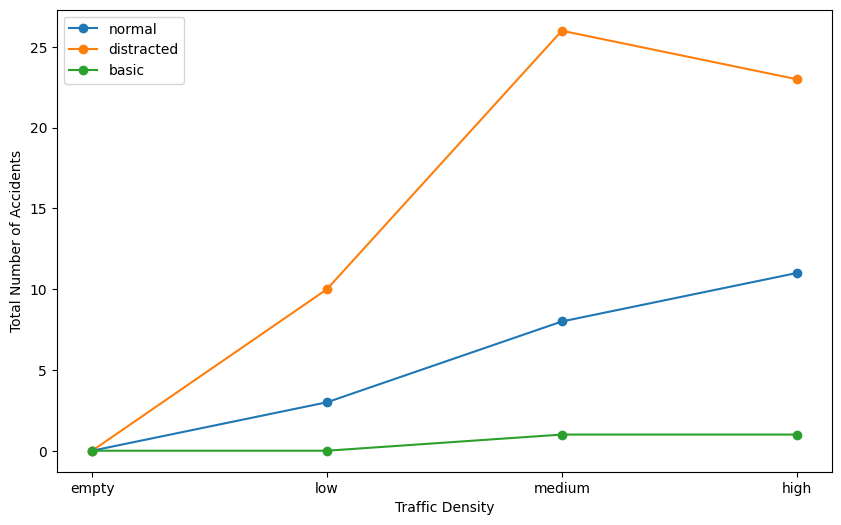

In [30]:
file_paths = list(data_folders.values())
agg_df = pd.DataFrame()
for file_path in file_paths:
    df = autils.create_episode_df(file_path)
    df['date'] = file_path.split('\\')[-2]
    df['time'] = file_path.split('\\')[-1]
    agg_df = pd.concat([agg_df, df])
# autils.plot_accidents_vs_traffic_density(agg_df)
_plot_accidents_vs_traffic_density(agg_df)
# save the aggregated data
# agg_df.to_csv(os.path.join(project_directory, 'outputs', 'experiment_1', 'episode_df.csv'), index=False)
# print(agg_df['n_collision_vehicle'].sum(), agg_df['n_collision_pedestrian'].sum())

In [ ]:
collisions = pd.DataFrame()
for file_path in file_paths:
    df = autils.create_df_for_collisions_with_moving_objects(file_path)
    collisions = pd.concat([collisions, df])

print(len(collisions))


In [ ]:
collisions.T

In [ ]:
# config_path = r"C:\Users\abjawad\Documents\GitHub\carla-roach-0.9.13\config\benchmark.yaml"

# accident_id = 20

# accidents_vehicle = collisions.iloc[accident_id]
# start_time = float(accidents_vehicle['simulation_time']) - 5
# duration = 10
# actor_id = int(accidents_vehicle['other_actor_id'])
# suite_name = accidents_vehicle['suite']
# run_name = accidents_vehicle['run']
# recorder_file_path = os.path.join(file_path, 'diagnostics', suite_name, f'{run_name}.log')
# print(recorder_file_path)
# autils.run_replay(config_path, recorder_file_path, actor_id, start_time, duration)


In [ ]:
# accidents_vehicle_df = autils.create_df_for_collisions_with_vehicles(file_path)
# print('accidents_vehicle_df ', len(accidents_vehicle_df))
# accident_pedestrian_df = autils.create_df_for_collisions_with_pedestrians(file_path)
# print('accident_pedestrian_df ', len(accident_pedestrian_df))

# # accidents_vehicle_df.T
# accident_pedestrian_df.T

In [ ]:
# episode_df = autils.create_episode_df(file_path)
# # normal_driver = autils.get_episodes_with_driver_type(file_path, 'normal')
# # distracted_driver = autils.get_episodes_with_driver_type(file_path, 'distracted')
# episode_df.T
# # autils.plot_accidents_vs_traffic_density(distracted_driver)

In [ ]:
# accident_scenario_df = autils.get_collision_with_vehicle_scenario_df(file_path, accidents_vehicle_df)

# autils.plot_accidents_vs_traffic_density_from_accident_df(accident_pedestrian_df)
# len(accident_pedestrian_df)